In [1]:
from sklearn.decomposition import PCA
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.image as image
import pandas as pd

from PIL import Image

# I have used two different methods to solve this. The first is by using the PCA function from the sklearn library, while the second method is based on more manual, "step-by-step" work.

## PCA-function method:

In [13]:
img = Image.open(r"C:\Users\Marthin\Desktop\AI\Environments\project2_env\Picture.jpg")

In [14]:
# Convert from uint8 to float
img = np.array(img).astype(np.float) / 255.

# Set h to height, w to width, and c to channel
h, w, c = img.shape

# Flatten
img = img.reshape((h, -1))

print("Height: ", h)
print("Width: ", w)
print("Components: ", c)

Height:  579
Width:  1024
Components:  3


In [4]:
# Make a plot function which takes different values of components 

def component_plot(cmps):

    # PCA fit with image
    p = PCA(n_components=cmps).fit(img)

    # Transform binary labels back to multi-class labels
    compressed = p.transform(img)
    out = p.inverse_transform(compressed)
    out = out.reshape((h, w, c))

    # Show image with axis disabled
    plt.axis('off')
    plt.imshow(out)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


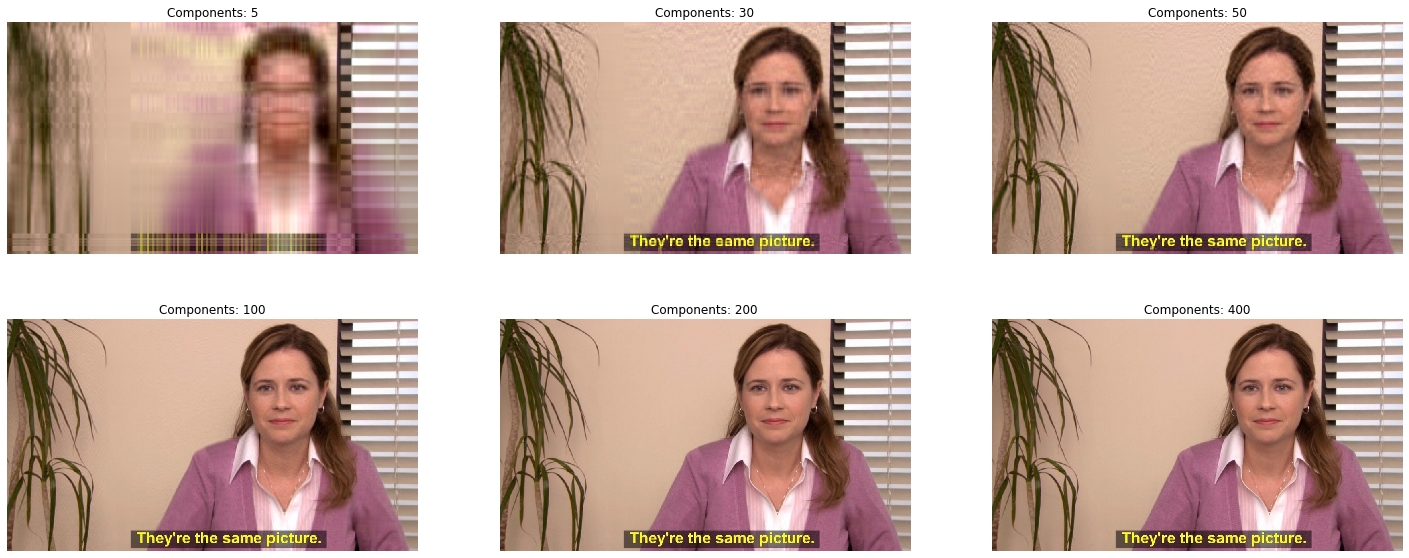

In [5]:
# Array of component-values
cmp_values = [5, 30, 50, 100, 200, 400]

plt.figure(figsize=[25,10])

# Loop through 6 plot-functions with different component-values
for i in range(6):   
    
    plt.subplot(2,3,i+1)
    component_plot(cmp_values[i])
    plt.title("Components: "+str(cmp_values[i]))

plt.show()


## Manual step-by-step method:

In [6]:
img = Image.open(r"C:\Users\Marthin\Desktop\AI\Environments\project2_env\Picture.jpg")

In [7]:
# Shrink so image isn't too big
img = img.resize((img.size[0]//12, img.size[1]//12))

# Convert from uint8 to float
img = np.array(img).astype(np.float) / 255.

h, w, c = img.shape

# Flatten
img = img.reshape((h, -1))

In [8]:
# Standardize

avg = img.mean(0)
std = img.std(0)
st_img = (img - avg) / std

In [9]:
# Compute covariance matrix
cov = np.dot(st_img.T, st_img) / h

# Compute eigenvalues/vectors
Eval, Evec = np.linalg.eigh(cov)

# Sort from most to least important
I = np.argsort(-Eval)
Eval = Eval[I]
Evec = Evec[:,I]

In [10]:
# Compress and uncompress
compressed = np.dot(img, Evec[:,:6])
u = np.dot(compressed, Evec[:,:6].T)

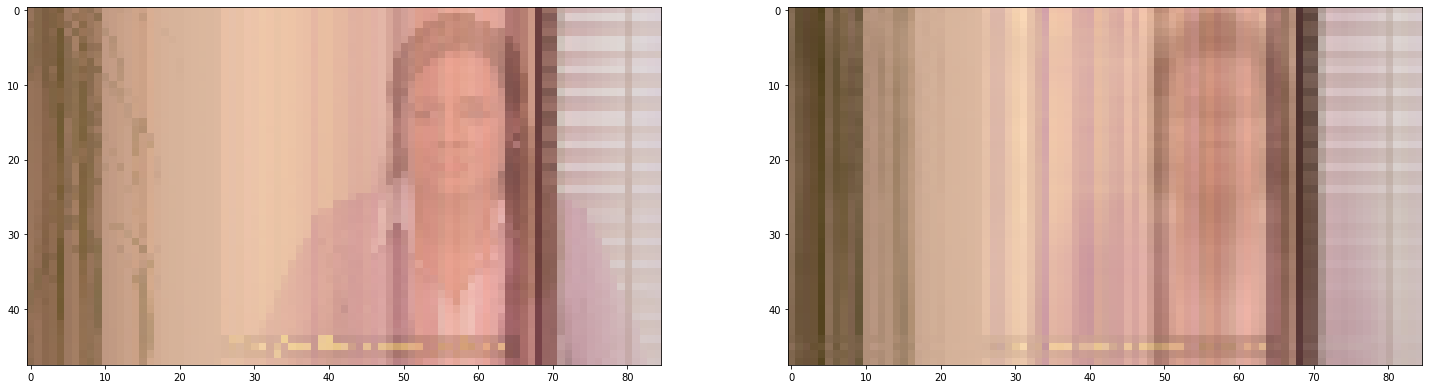

In [11]:
# Visualize original image and compressed image
plt.figure(figsize=[25,10])
plt.subplot(1, 2, 1)
plt.imshow((img * std + avg).reshape((h, w, c)))
plt.subplot(1, 2, 2)
plt.imshow((u * std + avg).reshape((h, w, c)))
plt.show()